

## İKİLİ SINIFLANDIRMA PROBLEMİ (Binary Classification Problem)


Scikit-learn kitaplığındaki make_circles() fonksiyonu , iki daire probleminden örneklem oluşturmanıza olanak tanır.
2 boyutlu 1000 örneklemli ve 0.1 oranında gürültü eklenerek yeni bir veri seti oluşturulur.

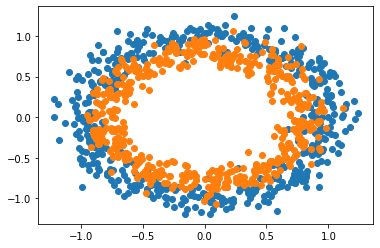

In [ ]:
# Example of generating samples from the two circle problem
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where
from keras.models import Sequential
from keras.layers import Dense

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scatter plot, dots colored by class value
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

Kodu çalıştırdığınızda , veri kümesini oluşturur ve noktaları x,y eksenli bir grafik üzerinde çizerek, sınıf 0 mavi daire gözlemleri ve sınıf 1 turuncu daireya ait gözlemleri gösterir.

# Çok Katmanlı Algılayıcı Modeli (Multilayer Perceptron Model)


In [ ]:
# split into train and test
# Veriyi train ve test seti oalarak ikiye ayırdık. 
# Test seti sayısı default= 500 olarak gelir.

n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

Artık MLP modelimizi tanımlayabiliriz. Model basittir, veri kümesinden 2 girdi değeri, 100 düğümlü tek bir gizli katman ve bir ReLU aktivasyon işlevi, ardından tek düğümlü bir çıkış katmanı ve bir sigmoid aktivasyon işlevi beklenir. Model, girdi örneğinin sınıf 0'a mı yoksa sınıf 1'e mi ait olduğu tahmin edecektir.

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Model derlenirken; kayıp fonksiyonu olarak ikili çapraz entropi,
#Stokastik Gradyan İniş Algoritmasının 'Adam' en iyileyicisi
#ve sınıflandırmada doğruluk metriği kullanılacaktır.


In [ ]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Modelimizi 300 devir eğitip her eğitim devri sonucunda modelin performansını değerlendireceğiz.

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

Train ve Test veri setinde modeli değerlendirdik.

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.848


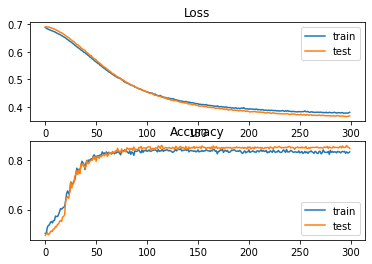

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train ve Test veri setlerinin sınıflandırmadaki kayıp ve doğruluk oranlarını gösteren grafiklerdir.

# Model Başarı Metriklerinin Hesaplanması


In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
 
# generate and prepare the dataset
def get_data():
 # generate 2d classification dataset
 X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
 # split into train and test
 n_test = 500
 trainX, testX = X[:n_test, :], X[n_test:, :]
 trainy, testy = y[:n_test], y[n_test:]
 return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
 # define model
 model = Sequential()
 model.add(Dense(100, input_shape=(2,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit model
 model.fit(trainX, trainy, epochs=300, verbose=0)
 return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
 
 
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set


yhat_classes = (model.predict(testX) > 0.5).astype("int32")


# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

16/16 [==============================] - 0s 1ms/step
Accuracy: 0.850000
Precision: 0.858300
Recall: 0.841270
F1 score: 0.849699
Cohens kappa: 0.700029
ROC AUC: 0.925099
[[213  35]
 [ 40 212]]
